In [1]:
# importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [2]:
# loading the dataset
df = pd.read_csv('data/gurgaon_properties_cleaned(round2).csv')

In [3]:
df.head()

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 50,5.00,215517.0,232.0,Plot area 2(1011.71 sq.m.),6,5,3+,...,NaN,2.0,NaN,1,1,0,1,1,1,0
1,flat,dlf regal gardens,sector 90,1.29,1430.0,9020.0,Super Built up area 1702(158.12 sq.m.)Built Up...,3,3,3,...,1702.0,1540.0,1430.0,1,0,0,0,0,2,174
2,flat,ireo the grand arch,sector 58,2.20,1375.0,16000.0,Carpet area: 1375 (127.74 sq.m.),2,2,1,...,NaN,NaN,1375.0,0,0,0,1,0,1,49
3,flat,ireo victory valley,sector 67,2.95,2436.0,12110.0,Super Built up area 2436(226.31 sq.m.)Built Up...,3,3,3+,...,2436.0,2236.0,2036.0,0,1,0,1,0,1,165
4,flat,puri emerald bay,sector 104,2.23,2250.0,9911.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3,4,3+,...,2450.0,NaN,2250.0,0,1,0,0,0,1,159


checking each numerical column for the outlier detection

#### `price` column

<Figure size 700x400 with 0 Axes>

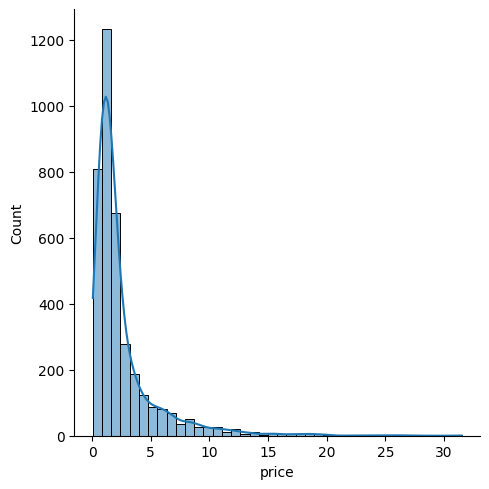

In [4]:
plt.figure(figsize=(7,4))
sns.displot(df['price'], bins= 40, kde=True)
plt.show()

It shows that data in 'price' column is rightly skewed. Thus visualizing the presence of outliers through box plot

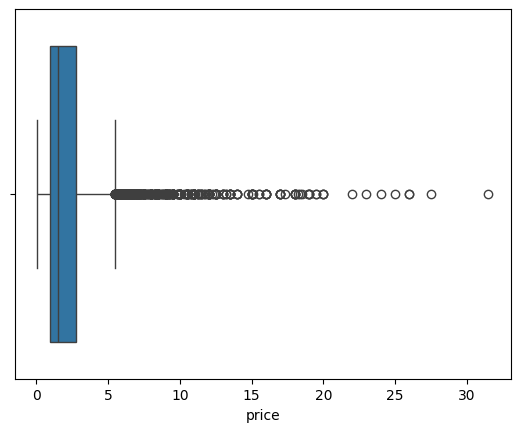

In [5]:
sns.boxplot(data=df, x='price')
plt.show()

In [13]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

print(f"Number of Outliers: {num_outliers}\n\nDescriptive Statistics: {outliers_price_stats}")

Number of Outliers: 435

Descriptive Statistics: count    435.000000
mean       9.221540
std        4.057075
min        5.490000
25%        6.440000
50%        8.000000
75%       10.655000
max       31.500000
Name: price, dtype: float64


In [15]:
# checking the outliers
outliers.sort_values(by='price', ascending=False).head(20)

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
90,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,9000.0,35000.0,Plot area 1000(836.13 sq.m.),7,9,3+,...,NaN,9000.0,NaN,1,1,1,1,0,0,74
1089,house,independent,sector 43,27.50,11286.0,24366.0,Plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,11286.0,NaN,1,1,0,1,1,1,42
1687,house,dlf city plots,sector 26,26.00,4545.0,57206.0,Plot area 505(422.24 sq.m.),6,7,3+,...,NaN,4545.0,NaN,1,1,0,1,1,1,138
501,house,independent,sector 26,26.00,3150.0,82540.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,...,NaN,400.0,350.0,1,1,1,1,0,0,72
3036,house,suncity township,sector 54,25.00,8036.0,31111.0,Plot area 1000(836.13 sq.m.),4,4,3+,...,NaN,1000.0,NaN,1,1,1,1,0,2,0
591,house,emaar the palm springs,sector 54,24.00,400.0,600000.0,Plot area 400(37.16 sq.m.),5,5,2,...,NaN,400.0,NaN,1,1,0,1,0,1,122
3403,house,independent,sector 26,23.00,9000.0,25556.0,Plot area 1000(836.13 sq.m.),4,4,3+,...,NaN,9000.0,NaN,1,1,1,1,0,1,145
2783,house,vipul tatvam villa,sector 48,22.00,8250.0,26667.0,Plot area 1000(836.13 sq.m.),5,6,3,...,NaN,1000.0,NaN,0,1,0,0,0,2,54
109,house,independent,sector 26,20.00,4500.0,44444.0,Plot area 500(418.06 sq.m.),5,7,3+,...,NaN,4500.0,NaN,0,1,0,1,0,0,97
2542,house,dlf city plots,sector 26,20.00,4518.0,44265.0,Plot area 502(419.74 sq.m.),16,20,3+,...,NaN,4518.0,NaN,1,1,1,1,0,1,153


In [18]:
outliers['price'].sort_values(ascending=False).value_counts()

price
6.50    23
5.50    22
6.00    19
7.00    16
8.00    15
        ..
6.02     1
5.85     1
5.88     1
5.51     1
5.49     1
Name: count, Length: 136, dtype: int64